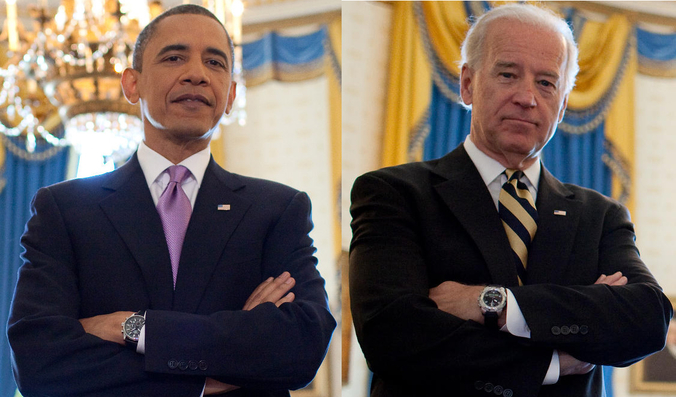

In [7]:
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display

# The program we will be finding faces on the example below
pil_im = Image.open('two_people.jpg')
display(pil_im)

In [4]:
import face_recognition
import numpy as np
import os
from PIL import Image, ImageDraw
from IPython.display import display

# # This is an example of running face recognition on a single image
# # and drawing a box around each person that was identified.

# # Load a sample picture and learn how to recognize it.
# obama_image = face_recognition.load_image_file("obama.jpg")
# obama_face_encoding = face_recognition.face_encodings(obama_image)[0]
# print('obama_face_encoding:', obama_face_encoding)
# # Load a second sample picture and learn how to recognize it.
# biden_image = face_recognition.load_image_file("biden.jpg")
# biden_face_encoding = face_recognition.face_encodings(biden_image)[0]
# print('biden_face_encoding:', biden_face_encoding)
# # Create arrays of known face encodings and their names
# known_face_encodings = [
#     obama_face_encoding,
#     biden_face_encoding
# ]
# known_face_names = [
#     "Barack Obama",
#     "Joe Biden"
# ]
# print('Learned encoding for', len(known_face_encodings), 'images.')


import face_recognition
import numpy as np
import os

main_folder = os.getcwd() + '/person'
known_face_encodings = []
known_face_names = []
    
# Duyệt qua các folder con (mỗi folder là của 1 người)
for person_folder in os.listdir(main_folder):
    person_path = os.path.join(main_folder, person_folder)
    if os.path.isdir(person_path):
        print(f"Đang xử lý người: {person_folder}")
        person_encodings = []
            
        # Duyệt qua các file ảnh trong folder của người đó
        for filename in os.listdir(person_path):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(person_path, filename)
                print(f"  Đang load ảnh: {filename}")
                image = face_recognition.load_image_file(image_path)
                # Lấy encoding từ ảnh (giả sử mỗi ảnh chỉ chứa 1 khuôn mặt)
                face_encodings = face_recognition.face_encodings(image)
                if face_encodings:
                    person_encodings.append(face_encodings[0])
                else:
                    print(f"  Không tìm thấy khuôn mặt trong ảnh: {filename}")
            
        if person_encodings:
            # Tính trung bình các encoding của 1 người (để có đại diện ổn định)
            average_encoding = np.mean(person_encodings, axis=0)
            known_face_encodings.append(average_encoding)
            known_face_names.append(person_folder)
            print(f"  Đã thêm {person_folder} với {len(person_encodings)} ảnh.")
        else:
            print(f"  Không có encoding hợp lệ cho {person_folder}.")
    
print("Đã học encoding cho", len(known_face_encodings), "người.")

    





Đang xử lý người: go_youn_jung
  Đang load ảnh: img1.jpg
  Đang load ảnh: img3.jpg
  Đang load ảnh: img4.jpg
  Đang load ảnh: img8.jpg
  Đã thêm go_youn_jung với 4 ảnh.
Đang xử lý người: xuan_hung
  Đang load ảnh: front.jpg
  Đang load ảnh: left.jpg
  Đang load ảnh: right.jpg
  Không tìm thấy khuôn mặt trong ảnh: right.jpg
  Đã thêm xuan_hung với 2 ảnh.
Đã học encoding cho 2 người.


In [ ]:
# Load an image with an unknown face
unknown_image = face_recognition.load_image_file("cccd.jpg")
# Find all the faces and face encodings in the unknown image
face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

# Convert the image to a PIL-format image so that we can draw on top of it with the Pillow library
# See http://pillow.readthedocs.io/ for more about PIL/Pillow
pil_image = Image.fromarray(unknown_image)
# Create a Pillow ImageDraw Draw instance to draw with
draw = ImageDraw.Draw(pil_image)
font = ImageFont.truetype("arial.ttf", 32)
# Loop through each face found in the unknown image
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    # Or instead, use the known face with the smallest distance to the new face
    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    # Draw a box around the face using the Pillow module
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

    # Draw a label with a name below the face
    bbox = draw.textbbox((left, bottom), name, font=font)  # Lấy bounding box của văn bản
    text_width = bbox[2] - bbox[0]  # Chiều rộng văn bản
    text_height = bbox[3] - bbox[1]  # Chiều cao văn bản

    draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255), font=font)


# Remove the drawing library from memory as per the Pillow docs
del draw

# Display the resulting image
display(pil_image)

: 